## Simulations with demo network

Loading model with libsbml and inspect main model features.

In [25]:
import libsbml
!ls

Koenig_demo_distributions_01.csv  Koenig demo network.ipynb  Koenig_demo.xml


In [63]:
doc = libsbml.readSBMLFromFile("Koenig_demo.xml")
model = doc.getModel()
print(model.getId())
print(model.getListOfSpecies())
for s in model.getListOfSpecies():
    print s.getId(), s.getName(), s.getUnits()

Koenig_demo
<ListOfSpecies[6]>
A_in A inside mole
B_in B inside mole
C_in C inside mole
A_out A outside mole
B_out B outside mole
C_out C outside mole


In [37]:
??libantimony.getAntimonyString

In [39]:
import libantimony
libantimony.loadSBMLFile('Koenig_demo.xml')
mod_names = libantimony.getModuleNames()
print mod_names
ant_string = libantimony.getAntimonyString('Koenig_demo')
print(ant_string)


('__main', 'Koenig_demo')
//Created by libAntimony v2.7.0
model *Koenig_demo()

  // Compartments and Species:
  compartment outside, inside;
  species A_in in inside, B_in in inside, C_in in inside, A_out in inside;
  species B_out in inside, C_out in inside;

  // Reactions:
  b1: A_out => A_in; (scale_f*(Vmax_b1/Km_A)*(A_out - A_in))/(1 + A_out/Km_A + A_in/Km_A);
  b2: B_in => B_out; (scale_f*(Vmax_b2/Km_B)*(B_in - B_out))/(1 + B_out/Km_B + B_in/Km_B);
  b3: C_in => C_out; (scale_f*(Vmax_b3/Km_C)*(C_in - C_out))/(1 + C_out/Km_C + C_in/Km_C);
  v1: A_in -> B_in; (scale_f*Vmax_v1)/Km_A*(A_in - 1/Keq_v1*B_in);
  v2: A_in -> C_in; (scale_f*Vmax_v2)/Km_A*A_in;
  v3: C_in -> A_in; (scale_f*Vmax_v3)/Km_A*C_in;
  v4: C_in -> B_in; (scale_f*Vmax_v4)/Km_A*(C_in - 1/Keq_v4*B_in);

  // Species initializations:
  A_in = 0;
  A_in has mM;
  B_in = 0;
  B_in has mM;
  C_in = 0;
  C_in has mM;
  A_out = 10;
  A_out has mM;
  B_out = 0;
  B_out has mM;
  C_out = 0;
  C_out has mM;

  // Compartment

** Running simulations with demo network **

Provides examples for the use of the simple demo network.
TODO: provide proper packages for imports of the individual components.

First import roadrunner for simulations.

In [40]:
import roadrunner
roadrunner.getVersionStr()

'1.3; Compiler: gcc 4.6.3, C++ version: 1; JIT Compiler: LLVM-3.4; Date: Jan 12 2015, 16:43:38'

# RoadRunner simulation

Loading the model and performing a simple time course simulation.

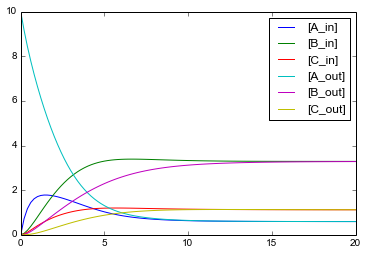

In [54]:
%matplotlib inline
rr = roadrunner.RoadRunner('Koenig_demo.xml')
rr.selections
s = rr.simulate(0,20, 100, plot=True)

The simulation objects is in the state of the end point of the simulation. One can query the steady state values via simple dot syntax.

In [65]:
print('A_in = {}'.format(rr.A_in))
print('Vmax_b1 = {}'.format(rr.Vmax_b1))

A_in = 0.593165574596
Vmax_b1 = 5.0


The units can be read out from the SBML file.

In [68]:
print model
print type(model)

<Model Koenig_demo "Koenig2014_demo_kinetic_v7">
<class 'libsbml.Model'>


In [91]:
s = model.getSpecies('A_in')
print s, s.getId(), s.getName()
print s.getUnits()   # has mole as unit due to substance units
print s.has_only_substance_units

print s.toSBML()

udef =  s.getDerivedUnitDefinition()
libsbml.UnitDefinition_printUnits(udef)

<Species A_in "A inside"> A_in A inside
mole
False
<species id="A_in" name="A inside" compartment="inside" initialConcentration="0" substanceUnits="mole" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>


'mole (exponent = 1, multiplier = 1, scale = 0), metre (exponent = -3, multiplier = 1, scale = 0)'

# Repeated simulations

Parameter scan or multiple simulations.

In [10]:



import django
django.setup()

In [14]:
import odesim

In [16]:
ls

Koenig_demo_distributions_01.csv  Koenig demo network.ipynb  Koenig_demo.xml


In [18]:
model = django_model_from_file('Koenig_demo.xml', sync=False)

('/home/mkoenig/multiscale-galactose/python/simulator/examples/demo', 'Koenig_demo.xml')
Django model already exists! - model is not saved
